In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Pseudo-subgroup prediction

In [8]:
prd_path = '/vol/biomedic3/es525/mammo-net/output-pseudo_subgroup/resnet18-b32-fixed-alpha-1.0-ffdm-lr-0.00001_singledensity_3manu_pseudo_balanced'
df_prd = pd.read_csv(os.path.join(prd_path, 'predictions.csv'))

In [9]:
preds = np.stack([df_prd['class_0'],df_prd['class_1'],df_prd['class_2']]).transpose()
labels = np.argmax(preds, axis=1)
targets = np.array(df_prd['target'])

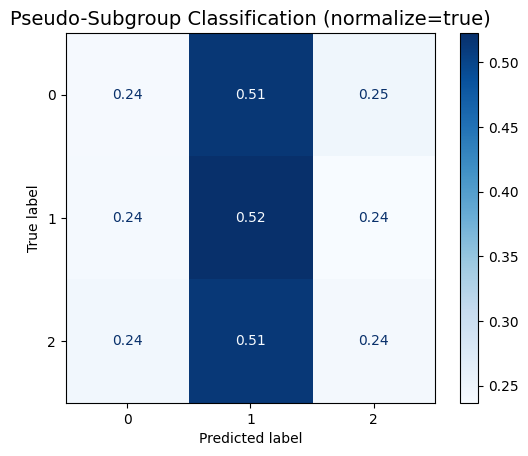

In [10]:
disp = ConfusionMatrixDisplay.from_predictions(targets, labels, 
                                               display_labels=['0', '1', '2'], 
                                               normalize='true', cmap='Blues')
plt.title('Pseudo-Subgroup Classification (normalize=true)', fontsize=14)
plt.show()

In [ ]:
# from chexploration code

# subgroup 0 
pos_label = 0
y = np.array(targets)
y[targets != pos_label] = 0
y[targets == pos_label] = 1
fpr_0, tpr_0, _ = roc_curve(y, preds[:,pos_label])
roc_auc_0 = auc(fpr_0, tpr_0)

# subgroup 1
pos_label = 1
y = np.array(targets)
y[targets != pos_label] = 0
y[targets == pos_label] = 1
fpr_1, tpr_1, _ = roc_curve(y, preds[:,pos_label])
roc_auc_1 = auc(fpr_1, tpr_1)

# subgroup 2
pos_label = 2
y = np.array(targets)
y[targets != pos_label] = 0
y[targets == pos_label] = 1
fpr_2, tpr_2, _ = roc_curve(y, preds[:,pos_label])
roc_auc_2 = auc(fpr_2, tpr_2)

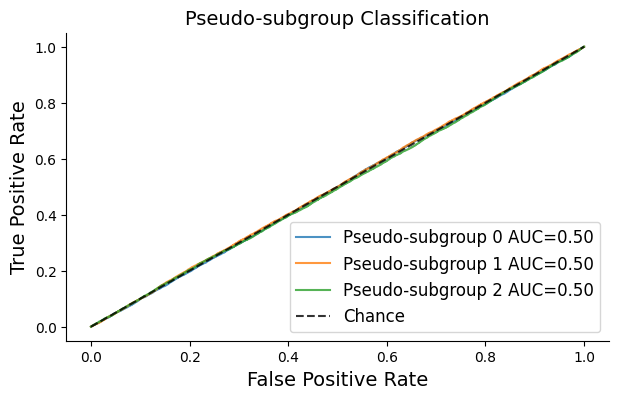

In [13]:
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(fpr_0, tpr_0, lw=1.5, alpha=.8, label='Pseudo-subgroup 0 AUC=%0.2f' % roc_auc_0)
plt.plot(fpr_1, tpr_1, lw=1.5, alpha=.8, label='Pseudo-subgroup 1 AUC=%0.2f' % roc_auc_1)
plt.plot(fpr_2, tpr_2, lw=1.5, alpha=.8, label='Pseudo-subgroup 2 AUC=%0.2f' % roc_auc_2)
ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.title('Pseudo-subgroup Classification', fontsize=14)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.spines[['right', 'top']].set_visible(False)
plt.show()

#### Manufacturer prediction

In [14]:
prd_path = '/vol/biomedic3/es525/mammo-net/output-manufacturer/resnet18-b32-fixed-alpha-1.0-ffdm-lr-0.00001_singledensity_3manu_pseudo_balanced'
df_prd = pd.read_csv(os.path.join(prd_path, 'predictions.csv'))

In [15]:
preds = np.stack([df_prd['class_0'],df_prd['class_1'],df_prd['class_2']]).transpose()
labels = np.argmax(preds, axis=1)
targets = np.array(df_prd['target'])

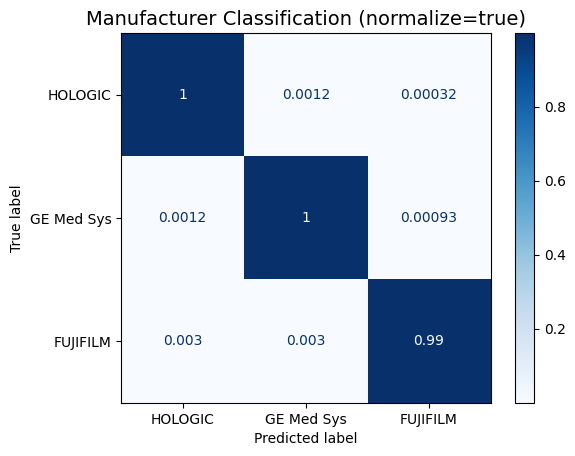

In [16]:
disp = ConfusionMatrixDisplay.from_predictions(targets, labels, 
                                               display_labels=['HOLOGIC', 'GE Med Sys', 'FUJIFILM'], 
                                               normalize='true', cmap='Blues')
plt.title('Manufacturer Classification (normalize=true)', fontsize=14)
plt.show()

In [19]:
# from chexploration code

# HOLOGIC, Inc
pos_label = 0
y = np.array(targets)
y[targets != pos_label] = 0
y[targets == pos_label] = 1
fpr_0, tpr_0, _ = roc_curve(y, preds[:,pos_label])
roc_auc_0 = auc(fpr_0, tpr_0)

# GE MEDICAL SYSTEMS
pos_label = 1
y = np.array(targets)
y[targets != pos_label] = 0
y[targets == pos_label] = 1
fpr_1, tpr_1, _ = roc_curve(y, preds[:,pos_label])
roc_auc_1 = auc(fpr_1, tpr_1)

# FUJIFILM Corporation
pos_label = 2
y = np.array(targets)
y[targets != pos_label] = 0
y[targets == pos_label] = 1
fpr_2, tpr_2, _ = roc_curve(y, preds[:,pos_label])
roc_auc_2 = auc(fpr_2, tpr_2)


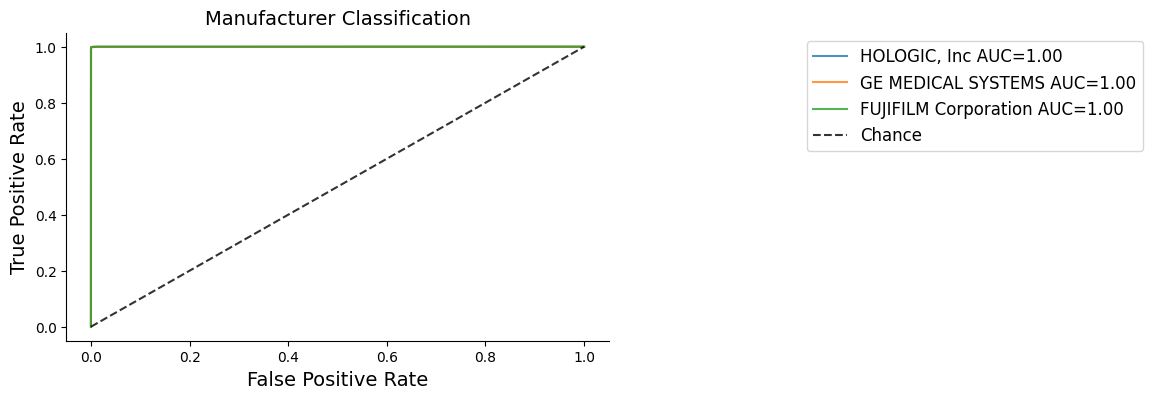

In [20]:
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(fpr_0, tpr_0, lw=1.5, alpha=.8, label='HOLOGIC, Inc AUC=%0.2f' % roc_auc_0)
plt.plot(fpr_1, tpr_1, lw=1.5, alpha=.8, label='GE MEDICAL SYSTEMS AUC=%0.2f' % roc_auc_1)
plt.plot(fpr_2, tpr_2, lw=1.5, alpha=.8, label='FUJIFILM Corporation AUC=%0.2f' % roc_auc_2)
ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="upper right", fontsize=12, bbox_to_anchor=(2, 1))
plt.title('Manufacturer Classification', fontsize=14)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.spines[['right', 'top']].set_visible(False)
plt.show()